In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

np.random.seed(47)

texts = pd.read_csv('Textdata.csv')
print(texts.head())
print(texts.tail())

le = LabelEncoder() 
  
texts['category']= le.fit_transform(texts['category'])

  category                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
     category                                               text
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name


In [6]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [7]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [8]:
texts['text'] = texts['text'].apply(preprocessor)

In [9]:
texts.iloc[0][1]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '

In [10]:
texts = texts.reindex(np.random.permutation(texts.index))

print(texts.head())
print(texts.tail())

      category                                               text
1297         0  sure i am driving but will reach my destinatio...
3173         0  do u still have plumbers tape and a wrench we ...
276          0                                             thanx 
3107         0  i had been hoping i would not have to send you...
4593         0  right it wasnt you who phoned it was someone w...
      category                                               text
2896         0                          went to ganesh dress shop
691          0                                 was the farm open 
3336         0            sorry got a late start we re on the way
1926         0  we don call like lt gt times oh no give us hyp...
5255         0                                   ok sweet dreams 


In [11]:
texts.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
0         4825   4506                              sorry i ll call later   30
1          747    638  please call our customer service representativ...    4

In [12]:
texts['length'] = texts['text'].map(lambda text: len(text))
print(texts.head())

      category                                               text  length
1297         0  sure i am driving but will reach my destinatio...      53
3173         0  do u still have plumbers tape and a wrench we ...      59
276          0                                             thanx        6
3107         0  i had been hoping i would not have to send you...     285
4593         0  right it wasnt you who phoned it was someone w...      70


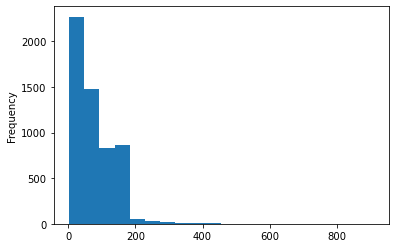

In [13]:
texts.length.plot(bins=20, kind='hist')

In [14]:
texts.length.describe()

count    5572.000000
mean       77.417624
std        57.310303
min         2.000000
25%        34.000000
50%        59.000000
75%       117.000000
max       908.000000
Name: length, dtype: float64

In [15]:
print(list(texts.text[texts.length < 60].index))
print(list(texts.text[texts.length < 60]))

[1297, 3173, 276, 1322, 1953, 2975, 723, 534, 2529, 5375, 145, 3890, 1530, 4405, 2739, 1333, 4218, 1526, 5072, 1246, 3875, 4308, 4733, 1234, 2409, 321, 1988, 4242, 3666, 4184, 4285, 4485, 4128, 2809, 2847, 4345, 4596, 1535, 3764, 5520, 450, 4229, 3914, 3313, 1436, 72, 5339, 3735, 2862, 377, 3412, 2484, 5262, 1001, 1753, 4109, 2948, 1369, 5090, 3028, 708, 5352, 1208, 558, 1980, 1106, 3284, 4059, 1932, 958, 664, 3728, 799, 1291, 860, 3438, 1748, 124, 2388, 3261, 3488, 4292, 636, 320, 1153, 3361, 2727, 2176, 2531, 4964, 4925, 865, 387, 1488, 3846, 928, 3453, 1058, 3471, 1258, 4110, 5220, 756, 3811, 2838, 3373, 4982, 3627, 2396, 5420, 1349, 3332, 3172, 1151, 1296, 1515, 5149, 2242, 3470, 825, 4098, 3534, 4328, 3098, 1187, 4924, 5240, 902, 5062, 987, 5323, 1751, 1111, 1558, 2417, 671, 3757, 1783, 2332, 4378, 4575, 3309, 3784, 5296, 836, 110, 1327, 3375, 3278, 3836, 3917, 2227, 2098, 1555, 669, 5199, 4247, 5217, 5320, 3024, 3520, 1844, 1209, 2077, 2775, 3054, 4563, 3253, 4972, 2366, 5216, 31

CPU times: user 82.4 ms, sys: 2.53 ms, total: 85 ms
Wall time: 83.6 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1106cc400>,
      dtype=object)

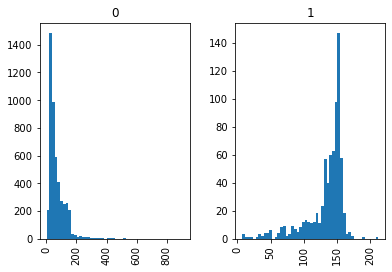

In [16]:
%%time
texts.hist(column='length', by='category', bins=50)

In [17]:
def split_into_tokens(text):
    text = str(text) # convert bytes into proper unicode
    return TextBlob(text).words

In [18]:
texts.text.head()

1297    sure i am driving but will reach my destinatio...
3173    do u still have plumbers tape and a wrench we ...
276                                                thanx 
3107    i had been hoping i would not have to send you...
4593    right it wasnt you who phoned it was someone w...
Name: text, dtype: object

In [19]:
texts.text.head().apply(split_into_tokens)

1297    [sure, i, am, driving, but, will, reach, my, d...
3173    [do, u, still, have, plumbers, tape, and, a, w...
276                                               [thanx]
3107    [i, had, been, hoping, i, would, not, have, to...
4593    [right, it, wasnt, you, who, phoned, it, was, ...
Name: text, dtype: object

In [20]:
TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/coreyyesavage/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [23]:
def split_into_lemmas(text):
    text= str(text).lower()
    words = TextBlob(text).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

texts.text.head().apply(split_into_lemmas)

1297            [sure, driving, reach, destination, soon]
3173     [u, still, plumber, tape, wrench, could, borrow]
276                                               [thanx]
3107    [hoping, would, send, message, rent, due, dont...
4593        [right, wasnt, phoned, someone, number, like]
Name: text, dtype: object

In [24]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(texts['text'])
print(len(bow_transformer.vocabulary_))

8066
CPU times: user 1.34 s, sys: 3.51 ms, total: 1.34 s
Wall time: 1.34 s


In [25]:
text4 = texts['text'][1466]
print(text4)

you 07801543489 are guaranteed the latests nokia phone a 40gb ipod mp3 player or a 500 prize txt word collect to no 83355 tc llc ny usa 150p mt msgrcvd18 


In [26]:
%%time
texts_bow = bow_transformer.transform(texts['text'])
print('sparse matrix shape:', texts_bow.shape)
print('number of non-zeros:', texts_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * texts_bow.nnz / (texts_bow.shape[0] * texts_bow.shape[1])))

sparse matrix shape: (5572, 8066)
number of non-zeros: 49461
sparsity: 0.11%
CPU times: user 1.32 s, sys: 2.46 ms, total: 1.32 s
Wall time: 1.32 s


In [27]:
texts_bow_train = texts_bow[:4400]
texts_bow_test = texts_bow[4400:]
texts_category_train = texts['category'][:4400]
texts_category_test = texts['category'][4400:]

print(texts_bow_train.shape)
print(texts_bow_test.shape)

(4400, 8066)
(1172, 8066)


In [28]:
%time text_category = MultinomialNB().fit(texts_bow_train, texts_category_train)

CPU times: user 2.77 ms, sys: 1.35 ms, total: 4.12 ms
Wall time: 2.98 ms


In [29]:
texts4 = texts['text'][3500]
print(texts4)

i hope you arnt pissed off but id would really like to see you tomorrow love me xxxxxxxxxxxxxx


In [30]:
bow4 = bow_transformer.transform([texts4])
print(bow4)

  (0, 1191)	1
  (0, 3696)	1
  (0, 3797)	1
  (0, 4339)	1
  (0, 4450)	1
  (0, 5473)	1
  (0, 5881)	1
  (0, 6265)	1
  (0, 7256)	1
  (0, 7921)	1
  (0, 7977)	1


In [31]:
print('predicted:', text_category.predict(bow4)[0])
print('expected:', texts.category[1789])

predicted: 0
expected: 0


In [32]:
predictions = text_category.predict(texts_bow_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [63]:
texts_bow = bow_transformer.transform(texts['text'])
print ('sparse matrix shape:', texts_bow.shape)
print ('number of non-zeros:', texts_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * texts_bow.nnz / (texts_bow.shape[0] * texts_bow.shape[1])))

sparse matrix shape: (5572, 8066)
number of non-zeros: 49461
sparsity: 0.11%


In [68]:
tfidf_transformer = TfidfTransformer().fit(texts_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print (tfidf4)

  (0, 7977)	0.43276069333087636
  (0, 7921)	0.26051241732896496
  (0, 7256)	0.24780148398082374
  (0, 6265)	0.22076552713370398
  (0, 5881)	0.2516793654610172
  (0, 5473)	0.3795355042791126
  (0, 4450)	0.21316687719808403
  (0, 4339)	0.20225201879158008
  (0, 3797)	0.31237279345466534
  (0, 3696)	0.2368843406848002
  (0, 1191)	0.43276069333087636


In [33]:
print('accuracy', accuracy_score(texts_category_test, predictions))
print('confusion matrix\n', confusion_matrix(texts_category_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.9872013651877133
confusion matrix
 [[1012    8]
 [   7  145]]
(row=expected, col=predicted)


In [70]:
texts_tfidf = tfidf_transformer.transform(texts_bow)
print (texts_tfidf.shape)

(5572, 8066)


In [81]:
print(classification_report(texts_category_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1020
           1       0.95      0.95      0.95       152

    accuracy                           0.99      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.99      0.99      0.99      1172



In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(units=1, input_shape=[1], 
                activation='sigmoid', kernel_regularizer=l1(0.01)))

# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
X = np.array(texts['category']).reshape(-1,1)
y = np.array(texts['text'])


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

In [39]:
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [40]:
texts.head()

,category,text,length
1297,0,sure i am driving but will reach my destinatio...,53
3173,0,do u still have plumbers tape and a wrench we ...,59
276,0,thanx,6
3107,0,i had been hoping i would not have to send you...,285
4593,0,right it wasnt you who phoned it was someone w...,70


In [41]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([1.])

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(texts["text"],texts["category"], test_size = 0.2, random_state = 10)

In [45]:
vect.fit(X_train)

CountVectorizer()

In [46]:
X_train_texts = vect.transform(X_train)
X_test_texts = vect.transform(X_test)
type(X_train_texts)

scipy.sparse.csr.csr_matrix

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_texts,y_train)

LogisticRegression()

In [48]:
prediction = dict()

prediction["Logistic"] = model.predict(X_test_texts)

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
accuracy_score(y_test,prediction["Logistic"])

0.9856502242152466

In [51]:
print(classification_report(y_test,prediction["Logistic"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       977
           1       0.99      0.89      0.94       138

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

max_depths = range(1,300,1)

dtc = tree.DecisionTreeClassifier(criterion='entropy')
grid = GridSearchCV(estimator=dtc, param_grid=dict(max_depth=max_depths),cv=3)
grid.fit(X_train_texts, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 300)})
0.9623070846040788
254


In [54]:
predicted = grid.predict(X_test_texts)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[963  14]
 [ 19 119]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       977
           1       0.89      0.86      0.88       138

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [55]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train_texts, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=47),
             param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]})
0.9712810775619211
400


In [56]:
predicted = grid.predict(X_test_texts)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[977   0]
 [ 16 122]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       977
           1       1.00      0.88      0.94       138

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [57]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV


n_estimators_list = [5,10,50,100,200,300,400,1000]

etc = ExtraTreesClassifier(random_state=47)
grid = GridSearchCV(estimator=etc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train_texts, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=47),
             param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]})
0.9780117610983471
200


In [58]:
predicted = grid.predict(X_test_texts)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[977   0]
 [ 16 122]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       977
           1       1.00      0.88      0.94       138

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=47)

n_estimators_list = [5,10,50,100,200,300,400,1000]
grid = GridSearchCV(estimator=gbc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train_texts, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=47),
             param_grid={'n_estimators': [5, 10, 50, 100, 200, 300, 400, 1000]})
0.9735254443643857
1000


In [60]:
predicted = grid.predict(X_test_texts)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[977   0]
 [ 20 118]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       977
           1       1.00      0.86      0.92       138

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

